In [1]:
import os, sys

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at
from astropy.table import join,vstack,Table

In [2]:
# Read in and merge the outputs from k2spin

base_dir = os.path.expanduser("~/data/tess/ic2391/tables/")
file_list = at.read(os.path.join(base_dir,"IC2391_2021-05-19.lst"))

In [3]:
all_arr = []
for filename in file_list["Filename"]:
    all_arr.append(at.read(os.path.join(base_dir,filename)))

In [4]:
results = vstack(all_arr)

In [5]:
results.show_in_notebook()

idx,target_name,provenance_name,sequence_number,obs_id,productFilename,author,fund_periods,fund_powers,sig_periods,sig_powers,sec_periods,sec_powers,thresholds,tics,num_sig_peaks,harm_types,flux_cols
0,44999952,CDIPS,8,hlsp_cdips_tess_ffi_gaiatwo0005317681678714511232-0008-cam3-ccd4_tess_v01_llc,hlsp_cdips_tess_ffi_gaiatwo0005317681678714511232-0008-cam3-ccd4_tess_v01_llc.fits,CDIPS,0.3078,0.1991,0.3078,0.1991,0.313,0.059,0.035572,44999952,2,-,TFA1
1,44999952,CDIPS,9,hlsp_cdips_tess_ffi_gaiatwo0005317681678714511232-0009-cam3-ccd3_tess_v01_llc,hlsp_cdips_tess_ffi_gaiatwo0005317681678714511232-0009-cam3-ccd3_tess_v01_llc.fits,CDIPS,0.3079,0.2293,0.3079,0.2293,0.7376,0.0722,0.023475,44999952,1,-,TFA1
2,44999952,CDIPS,10,hlsp_cdips_tess_ffi_gaiatwo0005317681678714511232-0010-cam3-ccd3_tess_v01_llc,hlsp_cdips_tess_ffi_gaiatwo0005317681678714511232-0010-cam3-ccd3_tess_v01_llc.fits,CDIPS,0.3075,0.1999,0.3075,0.1999,0.7367,0.0312,0.0237,44999952,1,-,TFA1
3,45049176,PATHOS,8,hlsp_pathos_tess_lightcurve_tic-0045049176-s0008_tess_v1_llc,hlsp_pathos_tess_lightcurve_tic-0045049176-s0008_tess_v1_llc.fits,PATHOS,32.6843,0.7704,32.6843,0.7704,9.6317,0.2286,0.034527,45049176,3,-,psf_flux_cor
4,45049176,PATHOS,9,hlsp_pathos_tess_lightcurve_tic-0045049176-s0009_tess_v1_llc,hlsp_pathos_tess_lightcurve_tic-0045049176-s0009_tess_v1_llc.fits,PATHOS,70.0,0.2306,3.309,0.0569,0.4148,0.0323,0.026966,45049176,3,-,psf_flux_cor
5,45050711,CDIPS,8,hlsp_cdips_tess_ffi_gaiatwo0005317838088544453760-0008-cam3-ccd4_tess_v01_llc,hlsp_cdips_tess_ffi_gaiatwo0005317838088544453760-0008-cam3-ccd4_tess_v01_llc.fits,CDIPS,0.7763,0.131,0.7763,0.131,0.8111,0.0434,0.02878,45050711,2,-,TFA1
6,45050711,CDIPS,9,hlsp_cdips_tess_ffi_gaiatwo0005317838088544453760-0009-cam3-ccd3_tess_v01_llc,hlsp_cdips_tess_ffi_gaiatwo0005317838088544453760-0009-cam3-ccd3_tess_v01_llc.fits,CDIPS,0.7747,0.1944,0.7747,0.1944,-9999.0,-9999.0,0.023765,45050711,0,-,TFA1
7,45050711,CDIPS,10,hlsp_cdips_tess_ffi_gaiatwo0005317838088544453760-0010-cam3-ccd3_tess_v01_llc,hlsp_cdips_tess_ffi_gaiatwo0005317838088544453760-0010-cam3-ccd3_tess_v01_llc.fits,CDIPS,0.7755,0.151,0.7755,0.151,0.8105,0.0385,0.026414,45050711,1,-,TFA1
8,45050711,PATHOS,8,hlsp_pathos_tess_lightcurve_tic-0045050711-s0008_tess_v1_llc,hlsp_pathos_tess_lightcurve_tic-0045050711-s0008_tess_v1_llc.fits,PATHOS,19.9067,0.4068,19.9067,0.4068,10.849,0.3792,0.040238,45050711,1,half-maybe,psf_flux_cor
9,45050711,PATHOS,9,hlsp_pathos_tess_lightcurve_tic-0045050711-s0009_tess_v1_llc,hlsp_pathos_tess_lightcurve_tic-0045050711-s0009_tess_v1_llc.fits,PATHOS,25.4777,0.5189,25.4777,0.5189,7.2059,0.2159,0.022124,45050711,4,-,psf_flux_cor


In [6]:
u_tic = np.unique(results["target_name"])

In [7]:
u_tic.dtype

dtype('int64')

In [8]:
N = len(u_tic)
dtype = [('TIC', 'int64'), ('NProt', 'i4'), ('Nclean', 'i4'), ('Prot', 'f8'), ('Prot_avg', 'f8'), ('Prot_std', 'f8')]
summary = Table(data=np.zeros(N, dtype=dtype))

In [9]:
for i, tic in enumerate(u_tic):
    loc = results["target_name"]==tic
    summary["TIC"][i] = tic
    summary["NProt"][i] = len(np.where(loc)[0])
    clean = np.where(loc & (results["num_sig_peaks"]==1))[0]
    summary["Nclean"][i] = len(clean)
    if len(clean)>0:
        summary["Prot"][i] = results["sig_periods"][clean][0]
        summary["Prot_avg"][i] = np.mean(results["sig_periods"][clean])
        summary["Prot_std"][i] = np.std(results["sig_periods"][clean])
    else:
        summary["Prot"][i] = -99

In [10]:
summary.show_in_notebook()

idx,TIC,NProt,Nclean,Prot,Prot_avg,Prot_std
0,44999952,18,6,0.3079,0.3077666666666667,0.00013743685418726267
1,45049176,8,0,-99.0,0.0,0.0
2,45050711,30,4,0.7755,5.5575,8.284514538583418
3,45184491,18,4,0.6897,0.6917,0.001168332144554806
4,45402598,30,8,0.6541,14.630025,14.069467230651451
5,45402925,20,2,1.43,2.14985,0.71985
6,45404408,30,8,0.7566,7.660775,11.999267746278312
7,45407296,18,5,0.2628,0.23893999999999999,0.02922242974155297
8,45781130,20,2,2.0778,2.0778,0.0
9,45786218,20,3,2.5142,1.570266666666667,0.6674626398200545


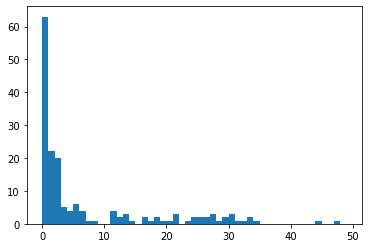

In [11]:
_ = plt.hist(summary["Prot"],bins=np.arange(0,50))

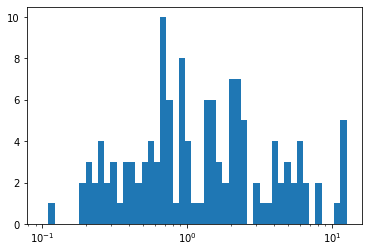

In [12]:
_ = plt.hist(summary["Prot"],bins=np.logspace(-1,1.1))
plt.xscale("log")

# Crossmatch back to Gaia data

In [13]:
gaia = at.read("IC2391_crossmatch_xmatch_TIC.csv")

In [14]:
summary_gaia = join(summary,gaia,keys=["TIC"])

In [15]:
len(summary_gaia)

267

In [16]:
bp_rp = summary_gaia["GAIAEDR3_BP"] - summary_gaia["GAIAEDR3_RP"]

In [17]:
std_avg = summary_gaia["Prot_std"]/summary_gaia["Prot_avg"]
clean = (summary_gaia["Nclean"]>=1) & (std_avg<=0.1)

/Users/stephanie/anaconda3/envs/lightkurve/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


99


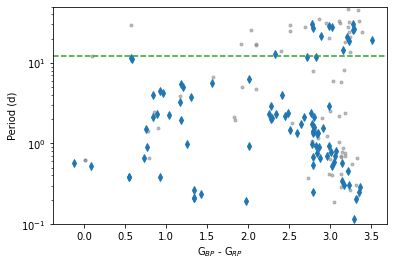

In [45]:
plt.plot(bp_rp,summary_gaia["Prot"],'.',color="grey",alpha=0.5)
plt.plot(bp_rp[clean],summary_gaia["Prot"][clean],'d',ms=5)
print(len(np.where(clean)[0]))

plt.ylim(0.1,50)
plt.yscale("log")

plt.xlabel(r"G$_{BP}$ - G$_{RP}$")
plt.ylabel("Period (d)")

ax = plt.gca()
ax.axhline(12,linestyle="--",color="C2")

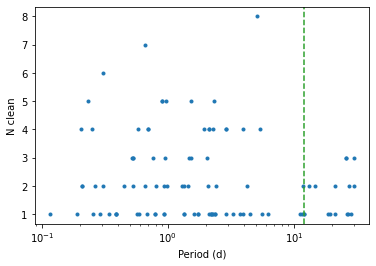

In [51]:
plt.plot(summary_gaia["Prot"][clean],summary_gaia["Nclean"][clean],'.')

plt.ylabel("N clean")
plt.xlabel("Period (d)")
plt.xscale("log")
ax = plt.gca()
ax.axvline(12,linestyle="--",color="C2")

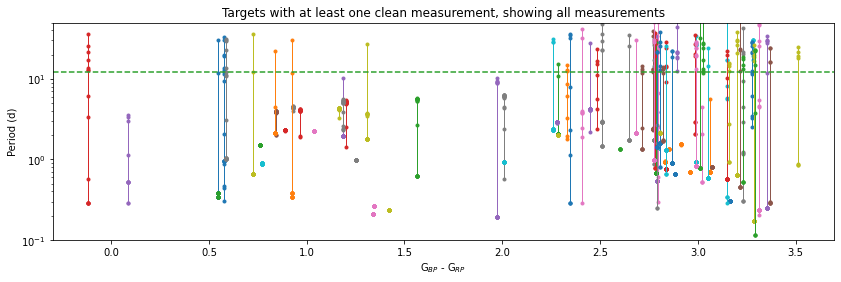

In [53]:
plt.figure(figsize=(14,4))
for i in np.where(clean)[0]:
    loc = np.where((results["target_name"]==summary_gaia["TIC"][i]) & (results["sig_periods"]>0))[0]
    plt.plot(np.ones(len(loc))*bp_rp[i],results["sig_periods"][loc],marker=".",linewidth=1)

plt.ylim(0.1,50)
plt.yscale("log")

plt.xlabel(r"G$_{BP}$ - G$_{RP}$")
plt.ylabel("Period (d)")
plt.title("Targets with at least one clean measurement, showing all measurements")

ax = plt.gca()
ax.axhline(12,linestyle="--",color="C2")

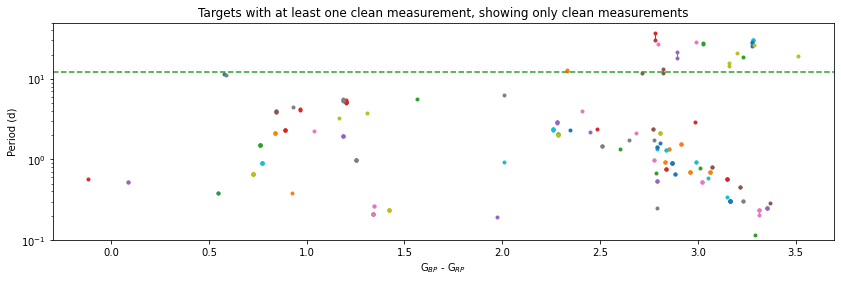

In [54]:
plt.figure(figsize=(14,4))
for i in np.where(clean)[0]:
    loc = np.where((results["target_name"]==summary_gaia["TIC"][i]) & (results["sig_periods"]>0) & (results["num_sig_peaks"]==1))[0]
    plt.plot(np.ones(len(loc))*bp_rp[i],results["sig_periods"][loc],marker=".",linewidth=1)

plt.ylim(0.1,50)
plt.yscale("log")

plt.xlabel(r"G$_{BP}$ - G$_{RP}$")
plt.ylabel("Period (d)")
plt.title("Targets with at least one clean measurement, showing only clean measurements")

ax = plt.gca()
ax.axhline(12,linestyle="--",color="C2")

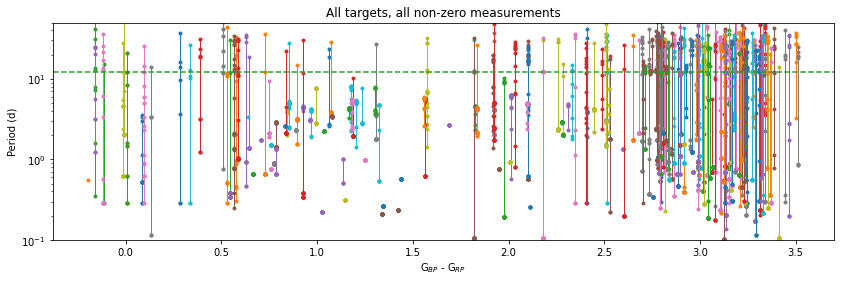

In [55]:
plt.figure(figsize=(14,4))
plt.plot(bp_rp,summary_gaia["Prot"],'.',color="grey",alpha=0.5)
for i in np.arange(len(summary_gaia)):
    loc = np.where((results["target_name"]==summary_gaia["TIC"][i]) & (results["sig_periods"]>0))[0]
    plt.plot(np.ones(len(loc))*bp_rp[i],results["sig_periods"][loc],marker=".",linewidth=1)

plt.ylim(0.1,50)
plt.yscale("log")

plt.xlabel(r"G$_{BP}$ - G$_{RP}$")
plt.ylabel("Period (d)")
plt.title("All targets, all non-zero measurements")

ax = plt.gca()
ax.axhline(12,linestyle="--",color="C2")

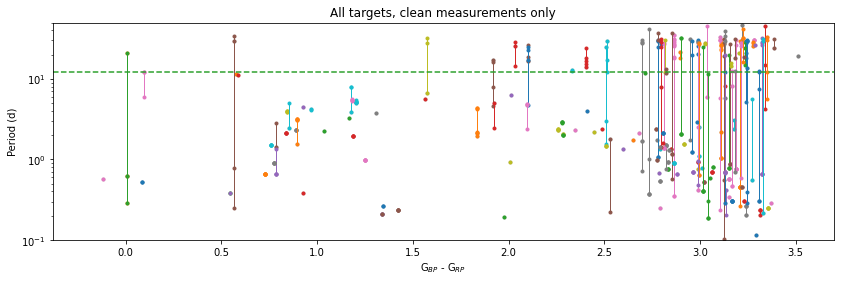

In [56]:
plt.figure(figsize=(14,4))
plt.plot(bp_rp,summary_gaia["Prot"],'.',color="grey",alpha=0.5)
for i in np.arange(len(summary_gaia)):
    loc = np.where((results["target_name"]==summary_gaia["TIC"][i]) & (results["sig_periods"]>0) & (results["num_sig_peaks"]==1))[0]
    plt.plot(np.ones(len(loc))*bp_rp[i],results["sig_periods"][loc],marker=".",linewidth=1)

plt.ylim(0.1,50)
plt.yscale("log")

plt.xlabel(r"G$_{BP}$ - G$_{RP}$")
plt.ylabel("Period (d)")
plt.title("All targets, clean measurements only")

ax = plt.gca()
ax.axhline(12,linestyle="--",color="C2")

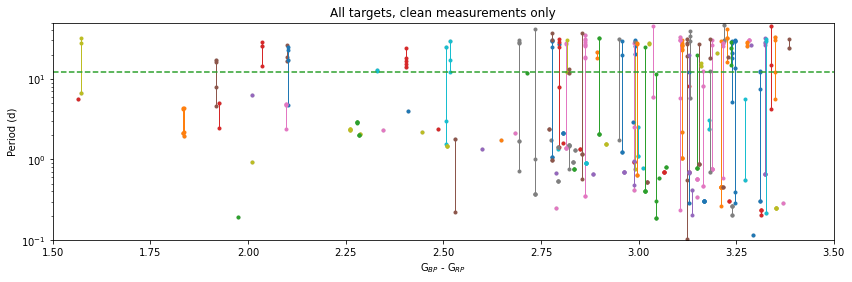

In [57]:
plt.figure(figsize=(14,4))
plt.plot(bp_rp,summary_gaia["Prot"],'.',color="grey",alpha=0.5)
for i in np.arange(len(summary_gaia)):
    loc = np.where((results["target_name"]==summary_gaia["TIC"][i]) & (results["sig_periods"]>0) & (results["num_sig_peaks"]==1))[0]
    plt.plot(np.ones(len(loc))*bp_rp[i],results["sig_periods"][loc],marker=".",linewidth=1)

plt.ylim(0.1,50)
plt.yscale("log")
plt.xlim(1.5,3.5)

plt.xlabel(r"G$_{BP}$ - G$_{RP}$")
plt.ylabel("Period (d)")
plt.title("All targets, clean measurements only")

ax = plt.gca()
ax.axhline(12,linestyle="--",color="C2")